# 蒙特卡洛法

## 计算$\pi$

In [35]:
# 计算pi

# 生成10000个(0,1)的点
import numpy as np

n = 100000

X = np.random.rand(n, 2)*2 - 1
X

array([[ 0.57126293, -0.62402304],
       [ 0.19909319,  0.15022177],
       [ 0.76837016,  0.06417706],
       ...,
       [-0.24262692, -0.74482231],
       [-0.14249417, -0.37089115],
       [ 0.49351076,  0.48993288]])

In [38]:
X.shape

(100000, 2)

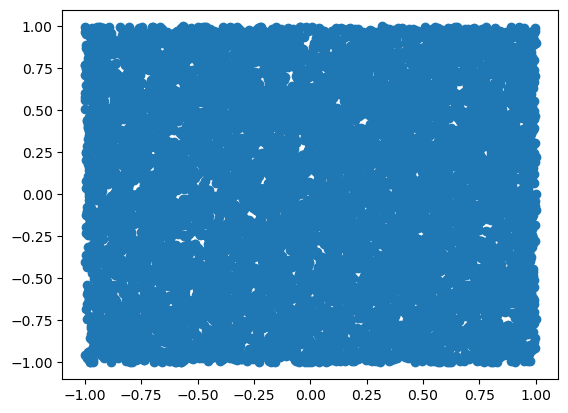

In [30]:
# 画图
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [39]:
# 计算点到原点的距离
dist = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
dist
dist.shape

(100000,)

In [32]:
# 计算在圆内的点的个数
in_circle = dist[dist < 1]
in_circle

array([0.55420539, 0.41738115, 0.10112177, ..., 0.52240415, 0.88158124,
       0.86282293])

In [33]:
num_in_circle = len(in_circle)
num_in_circle

7877

In [34]:
pi = 4 * num_in_circle / n
pi

3.1508

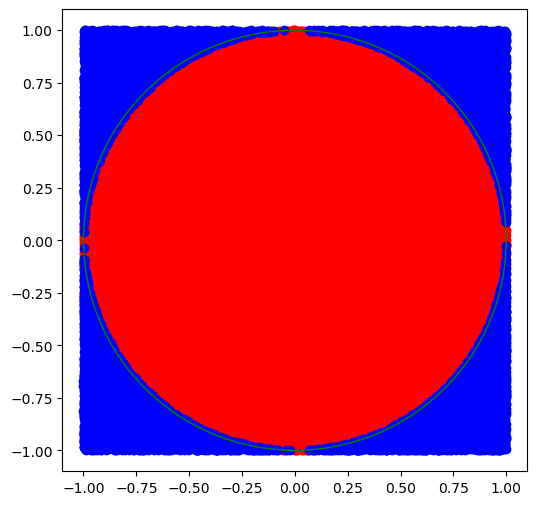

In [40]:
# 画图
plt.figure(figsize=(6, 6))

idx_in_circle = np.arange(n)[dist < 1]
idx_out_circle = np.arange(n)[dist >= 1]

plt.scatter(X[idx_in_circle, 0], X[idx_in_circle, 1], color='r')
plt.scatter(X[idx_out_circle, 0], X[idx_out_circle, 1], color='b')

# 画圆
circle = plt.Circle((0, 0), 1, color='g', fill=False)
plt.gca().add_artist(circle)
plt.show()

## 计算积分

### 用均匀分布抽样

In [41]:
# 定义函数
import numpy as np
def f(x):
    return np.exp(-0.5*x**2)

f(1)

0.6065306597126334

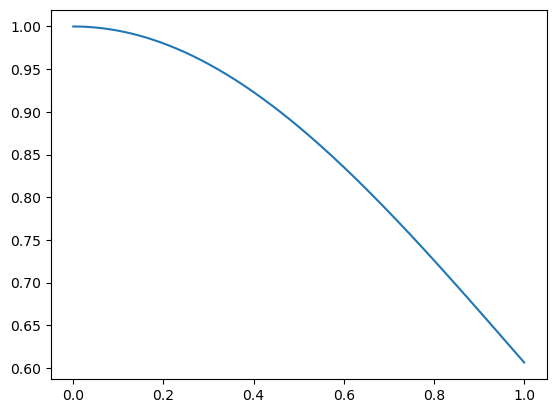

In [42]:
# 绘制函数图像
from matplotlib import pyplot as plt

x = np.linspace(0, 1, 1000)
y = f(x)
plt.plot(x, y)

In [46]:
# 均匀抽样
import numpy as np

n = 10000
X = np.random.rand(n)
X

array([0.3159393 , 0.40052643, 0.91524588, ..., 0.04161612, 0.28341158,
       0.18764445])

In [47]:
f_hat = np.mean(f(X))
f_hat

0.856133988488256

### 用正态分布抽样

In [48]:
# 定义函数
import numpy as np
def g(x):
    return x/(np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)

g(1)

0.24197072451914337

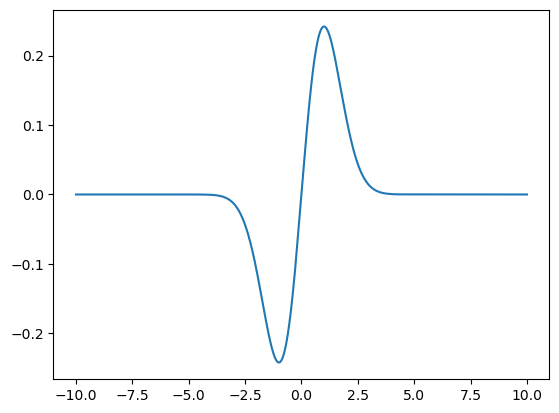

In [49]:
# 绘制函数图像
from matplotlib import pyplot as plt

x = np.linspace(10, -10, 1000)
y = g(x)
plt.plot(x, y)

In [69]:
# 正态抽样
import numpy as np
X = np.random.normal(0, 1, 100000)

f_hat = np.mean(g(X))
f_hat

-0.0006582214479006488

## 交通阻塞

蒙特卡罗方法不仅可以用于计算，还可以用于模拟系统内部的随机运动。下面的例子模拟单车道的交通堵塞。

根据 Nagel-Schreckenberg 模型，车辆的运动满足以下规则。

当前速度是 v 。
如果前面没车，它在下一秒的速度会提高到 v + 1 ，直到达到规定的最高限速。
如果前面有车，距离为d，且 d < v，那么它在下一秒的速度会降低到 d - 1 。
此外，司机还会以概率 p 随机减速， 将下一秒的速度降低到 v - 1 。

## 证券市场

证券市场有时交易活跃，有时交易冷清。下面是你对市场的预测。

如果交易冷清，你会以平均价11元，卖出5万股。
如果交易活跃，你会以平均价8元，卖出10万股。
如果交易温和，你会以平均价10元，卖出7.5万股。
已知你的成本在每股5.5元到7.5元之间，平均是6.5元。请问接下来的交易，你的净利润会是多少？

取1000个随机样本，每个样本有两个数值：一个是证券的成本（5.5元到7.5元之间的均匀分布），另一个是当前市场状态（冷清、活跃、温和，各有三分之一可能）。

In [160]:
# 随机采样
import numpy as np

n = 10000
cost = np.random.uniform(5.5, 7.5, n)
fix_cost = 120000
market = np.random.randint(0, 3, n)

price = [11, 8, 10]
quantity = [50000, 100000, 75000]

price_market = np.array([price[i] for i in market])
quantity_market = np.array([quantity[i] for i in market])

pi = np.mean((price_market - cost) * quantity_market-fix_cost)
pi

90905.00822210606